# First steps with OMEGA - Open box

Prepared by Benoit Côté.  If you have any question, please contact Benoit Côté at <bcote@uvic.ca> or Christian Ritter at <critter@uvic.ca>.

The First_steps_with_OMEGA_1_closed_box notebook (in the Teaching section) should be consulted before running the current notebook.

An open box in chemical evolution refers to a gas reservoir which exchange matter with its surrounding.  In addition to the star formation and enrichment processes, the gas reservoir is altered by galactic inflows (gas introduced in the system) and galactic outflows (enriched gas expelled from the system).  This notebook presents in a general way the impact of galactic inflows and outflows in galactic chemical evolution predictions.

See [Côté et al. (2016)](http://adsabs.harvard.edu/abs/2016arXiv160407824C "Title") and the OMEGA_userguide notebook for more inflow and outflow implementations.

In [1]:
# Python packages
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Shared class between SYGMA and OMEGA
import chem_evol
reload(chem_evol)

# One-zone galactic chemical evolution code
import omega
reload(omega)

<module 'omega' from '/Users/christian/Research/NuGRid/NuPyCEE/omega.pyc'>

## 1. Galactic inflows

In a closed-box model, all the gas needed to sustain the star formation history (SFH) needs to be in the gas reservoir at the beginning of the simulation.  This sets a limit on the minimum mass of the gas reservoir.  However, with an open-box model that includes galactic inflows, it is possible reduce the initial mass of gas below that limit, as the **inflowing gas will fuel the star formation process at later times**.

### 1.1. Galactic inflows and appearance of SNe Ia

Below is an example of how galactic inflows can help to control the appearance of SNe Ia on the [Fe/H] axis.  To do so, let's run simulations with different gas reservoirs using the *mgal* parameter.

In [2]:
# Run OMEGA simulations.
# Constant star formation rate with different initial gas reservoir (closed box).
o_res_1e11_close = omega.omega(cte_sfr=1.0, mgal=1e11)
o_res_1e10_close = omega.omega(cte_sfr=1.0, mgal=1e10)
o_res_1e09_close = omega.omega(cte_sfr=1.0, mgal=1e9)  # This is not enough gas to sustain the SFH.

# To isolate where the SN Ia appears, each simulation is ran a second
# time without the contribution of SNe Ia using the "sn1a_on" parameter.
o_res_1e11_close_noIa = omega.omega(cte_sfr=1.0, mgal=1e11, sn1a_on=False)
o_res_1e10_close_noIa = omega.omega(cte_sfr=1.0, mgal=1e10, sn1a_on=False)
o_res_1e09_close_noIa = omega.omega(cte_sfr=1.0, mgal=1e9,  sn1a_on=False)  # Still not enough gas.

OMEGA run in progress..
   OMEGA run completed - Run time: 2.94s
OMEGA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 2.56s
OMEGA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Warning -- Not enough gas to sustain the SFH. 23
Warning -- Not enough gas to sustain the SFH. 24
Warning -- Not enough gas to sustain the SFH. 25
Warning -- Not enough gas to sustain the SFH. 26
Warning -- Not enough gas to sustain the SFH. 27
Warning -- Not enough gas to sustain the SFH. 28
Warning -- Not enough gas to sustain the SFH. 29
Warning -- Not enough gas to sustain the SFH. 30
   OMEGA run completed - Run time: 2.71s
OMEGA run in progress..
   OMEGA run completed - Run time: 4.0s
OMEGA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 2.42s
OMEGA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Warning -- Not enough gas to sustain the SFH. 23
Warning -- Not enough gas to sustain the SFH. 24
Warning -- Not enough gas to sustain the SFH. 25
Warning -- Not enough gas to sustain the SFH. 26
Warning -- Not enough gas to sustain the SFH. 27
Warning -- Not enough gas to sustain the SFH. 28
Warning -- Not enough gas to sustain the SFH. 29
Warning -- Not enough gas to sustain the SFH. 30
   OMEGA run completed - Run time: 2.95s


The three plots below show the evolution of [C/Fe] as a function of [Fe/H] and the appearance of SNe Ia on the [Fe/H] axis, for different gas reservoirs.  **The initial mass of the gas reservoir has a significant impact on where SNe Ia first appear on the [Fe/H] axis**.

<IPython.core.display.Javascript object>


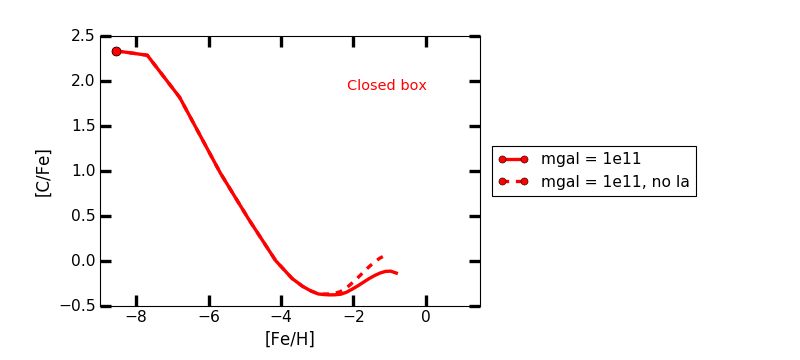

<IPython.core.display.Javascript object>


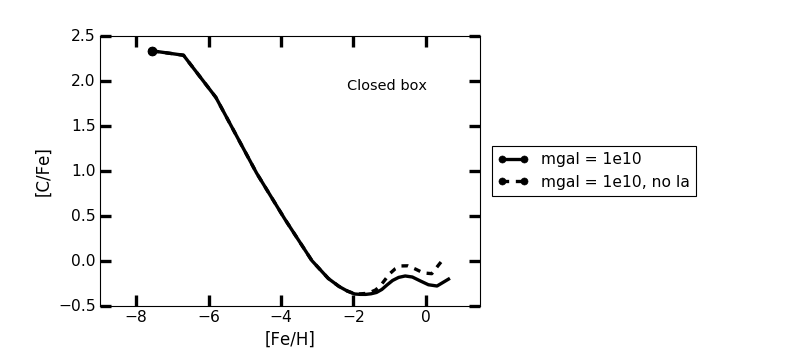

<IPython.core.display.Javascript object>


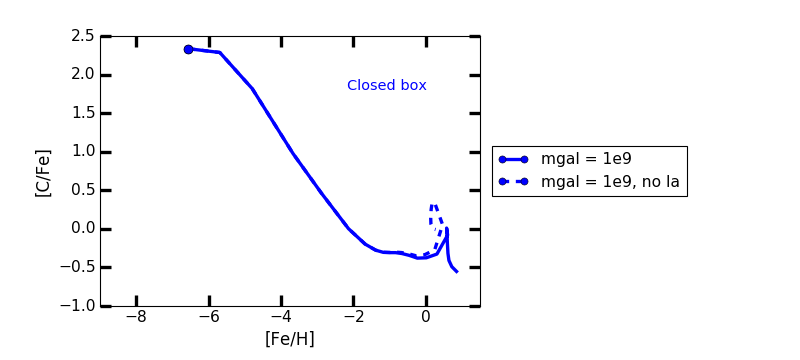

(-9, 1.5)

In [3]:
# Plot the predicted chemical evolution for carbon.
%matplotlib nbagg
yaxis = '[C/Fe]'
xaxis = '[Fe/H]'

# Initial gas mass of 1e11 Msun
o_res_1e11_close.plot_spectro(     fig=1, xaxis=xaxis, yaxis=yaxis, color='r', label='mgal = 1e11')
o_res_1e11_close_noIa.plot_spectro(fig=1, xaxis=xaxis, yaxis=yaxis, color='r', label='mgal = 1e11, no Ia', shape='--')
plt.annotate('Closed box', color='r', xy=(0.65, 0.8), xycoords='axes fraction', fontsize=13)
plt.xlim(-9,1.5)

# Initial gas mass of 1e10 Msun
o_res_1e10_close.plot_spectro(     fig=2, xaxis=xaxis, yaxis=yaxis, color='k', label='mgal = 1e10')
o_res_1e10_close_noIa.plot_spectro(fig=2, xaxis=xaxis, yaxis=yaxis, color='k', label='mgal = 1e10, no Ia', shape='--')
plt.annotate('Closed box', color='k', xy=(0.65, 0.8), xycoords='axes fraction', fontsize=13)
plt.xlim(-9,1.5)

# Initial gas mass of 1e09 Msun
o_res_1e09_close.plot_spectro(     fig=3, xaxis=xaxis, yaxis=yaxis, color='b', label='mgal = 1e9')
o_res_1e09_close_noIa.plot_spectro(fig=3, xaxis=xaxis, yaxis=yaxis, color='b', label='mgal = 1e9, no Ia', shape='--')
plt.annotate('Closed box', color='b', xy=(0.65, 0.8), xycoords='axes fraction', fontsize=13)
plt.xlim(-9,1.5)

In the Milky Way, for example, SNe Ia should appear around [Fe/H] = -1 (e.g., [Matteucci & Greggio 1986](http://adsabs.harvard.edu/abs/1986A&amp;A...154..279M); [Chiappini et al. 2001](http://adsabs.harvard.edu/abs/2001ApJ...554.1044C)).  As seen above, this can be achieved with a low-mass initial gas reservoir (blue lines).  However, with a closed-box model, the star formation eventually consumes all the gas reservoir.  When this happens, the subsequent star formation will feed from the stellar ejecta only and will generate unreliable predictions at high [Fe/H].  A solution is to include galactic inflows, which is done in the next simulations.

In [4]:
# Run OMEGA simulations.
# The "in_out_control" parameter allows to use an open box model.
# Please look at the OMEGA_userguide notebook for different open-box implementations.

# Low-mass gas reservoir with galactic inflows (no galactic outflow for now).
# The rates are set with the "outflow_rate" and "inflow_rate" parameters.
o_res_1e09_open = omega.omega(cte_sfr=1.0, mgal=1e9, in_out_control=True, outflow_rate=0.0, inflow_rate=1.0)

# Same simulation, but without the contribution of SNe Ia.
o_res_1e09_open_noIa = omega.omega(cte_sfr=1.0, mgal=1e9,\
    sn1a_on=False, in_out_control=True, outflow_rate=0.0, inflow_rate=1.0)

OMEGA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian

   OMEGA run completed - Run time: 3.03s
OMEGA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian

   OMEGA run completed - Run time: 2.81s


With the open-box version, as show in the plot below, SNe Ia still occurs around [Fe/H] = -1, but the system does not run out of gas anymore.  The predictions at high [Fe/H] are now reliable.

<IPython.core.display.Javascript object>


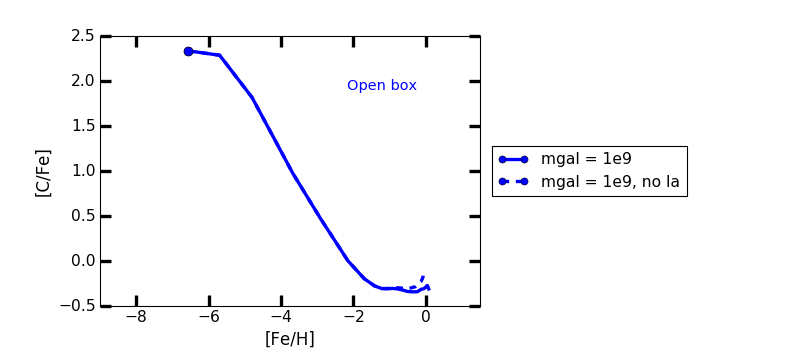

In [5]:
# Plot the predicted chemical evolution.
%matplotlib nbagg
o_res_1e09_open.plot_spectro(     xaxis=xaxis, yaxis=yaxis, color='b', label='mgal = 1e9')
o_res_1e09_open_noIa.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='b', label='mgal = 1e9, no Ia', shape='--')
plt.xlim(-9,1.5)

# Annotation
plt.annotate('Open box', color='b', xy=(0.65, 0.8), xycoords='axes fraction', fontsize=13)

### 1.2. Dilution process 

Galactic inflows typically have a lower metallicity than the gas inside galaxies.  Therefore, they tend to dilute the metal concentration of the galactic gas and to slow down the enrichment process (relation between [Fe/H] and time).  Let's run OMEGA simulations with different constant inflow rate, in units of M$_\odot$/yr, using the *inflow_rate* parameter.  Here, galactic inflows have primordial composition (only H, He, and Li).

In [6]:
# Run OMEGA simulations.
# Constant star formation rate with different inflow rate.
o_in_rate_0_0 = omega.omega(cte_sfr=1.0, mgal=2e10, in_out_control=True, outflow_rate=0.0, inflow_rate=0.0)
o_in_rate_1_0 = omega.omega(cte_sfr=1.0, mgal=2e10, in_out_control=True, outflow_rate=0.0, inflow_rate=1.0)
o_in_rate_3_0 = omega.omega(cte_sfr=1.0, mgal=2e10, in_out_control=True, outflow_rate=0.0, inflow_rate=3.0)
o_in_rate_9_0 = omega.omega(cte_sfr=1.0, mgal=2e10, in_out_control=True, outflow_rate=0.0, inflow_rate=9.0)

OMEGA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 2.91s
OMEGA run in progress..
   OMEGA run completed - Run time: 2.84s
OMEGA run in progress..
   OMEGA run completed - Run time: 2.53s
OMEGA run in progress..
   OMEGA run completed - Run time: 3.13s


The plot below shows the evolution of the mass of H, Ca, and Fe in the gas reservoir as a function time, for different inflow rates.

<IPython.core.display.Javascript object>


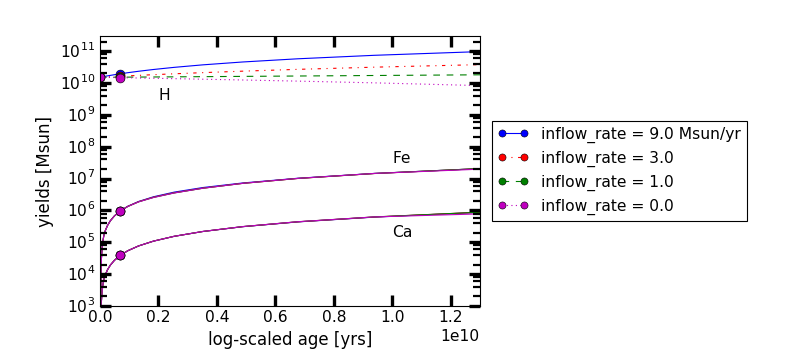

In [7]:
# Plot the mass of H, Ca, and Fe in the galactic gas as a function of time.
%matplotlib nbagg
o_in_rate_9_0.plot_mass(specie='H',  color='b', shape='-',  label='inflow_rate = 9.0 Msun/yr')
o_in_rate_3_0.plot_mass(specie='H',  color='r', shape='-.', label='inflow_rate = 3.0')
o_in_rate_1_0.plot_mass(specie='H',  color='g', shape='--', label='inflow_rate = 1.0')
o_in_rate_0_0.plot_mass(specie='H',  color='m', shape=':',  label='inflow_rate = 0.0')
o_in_rate_9_0.plot_mass(specie='Ca', color='b', show_legend=False)
o_in_rate_3_0.plot_mass(specie='Ca', color='r', show_legend=False)
o_in_rate_1_0.plot_mass(specie='Ca', color='g', show_legend=False)
o_in_rate_0_0.plot_mass(specie='Ca', color='m', show_legend=False)
o_in_rate_9_0.plot_mass(specie='Fe', color='b', show_legend=False)
o_in_rate_3_0.plot_mass(specie='Fe', color='r', show_legend=False)
o_in_rate_1_0.plot_mass(specie='Fe', color='g', show_legend=False)
o_in_rate_0_0.plot_mass(specie='Fe', color='m', show_legend=False)
plt.xscale('linear')
plt.ylim(1e3,3e11)

# Add element annotations.
plt.annotate('H',  xy=(0.2e10, 3.0e9))
plt.annotate('Ca', xy=(1.0e10, 1.5e5))
plt.annotate('Fe', xy=(1.0e10, 3.0e7))

As shown above, including stronger inflows increases the amount of H in the gas reservoir.  But, since the galactic inflows are primordial, Ca and Fe are not affected by them.  This means the evolution of [Ca/Fe] is not altered, as opposed to the evolution of [Fe/H], as shown in the following plots.

<IPython.core.display.Javascript object>


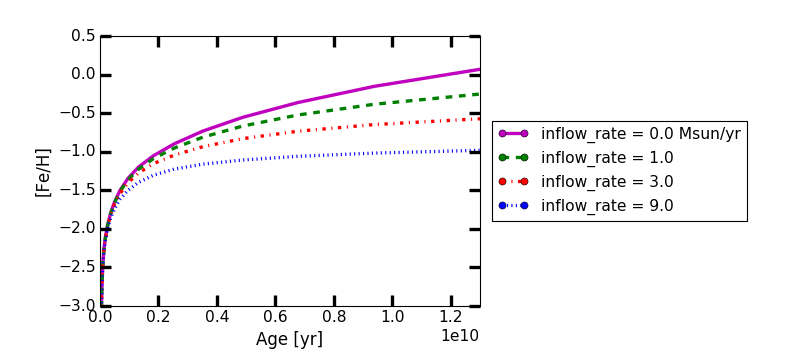

(-3, 0.5)

In [8]:
# Plot the evolution of [Fe/H] as a function of time.
%matplotlib nbagg
o_in_rate_0_0.plot_spectro(color='m', label='inflow_rate = 0.0 Msun/yr', shape='-')
o_in_rate_1_0.plot_spectro(color='g', label='inflow_rate = 1.0', shape='--')
o_in_rate_3_0.plot_spectro(color='r', label='inflow_rate = 3.0', shape='-.')
o_in_rate_9_0.plot_spectro(color='b', label='inflow_rate = 9.0', shape=':')
plt.ylim(-3, 0.5)

Galactic inflows dilute the metal concentration of the galactic gas, especially at late times, as the evolution of [Fe/H] at early times mainly depends on the initial mass of gas.  As shown in the next plot, **in the [X/Fe] vs [Fe/H] space, introducing galactic inflows shrinks the predictions and shifts the final [Fe/H] to lower values**.

<IPython.core.display.Javascript object>


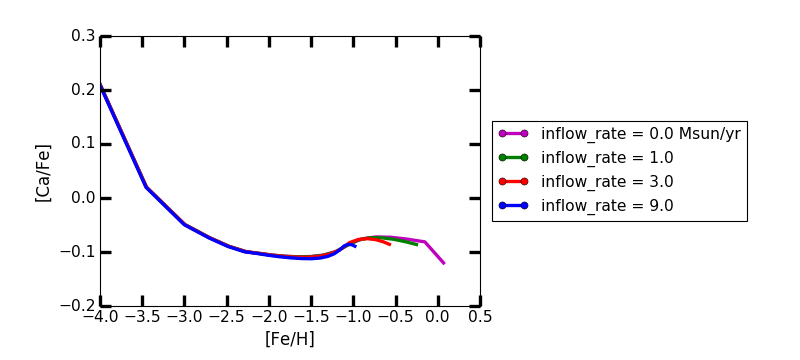

(-0.2, 0.3)

In [9]:
# Plot the predicted chemical evolution.
%matplotlib nbagg
yaxis = '[Ca/Fe]'
xaxis = '[Fe/H]'
o_in_rate_0_0.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='m', label='inflow_rate = 0.0 Msun/yr')
o_in_rate_1_0.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='g', label='inflow_rate = 1.0')
o_in_rate_3_0.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='r', label='inflow_rate = 3.0')
o_in_rate_9_0.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='b', label='inflow_rate = 9.0')
plt.xlim(-4.0, 0.5)
plt.ylim(-0.2, 0.3)

### 1.3. Exercise with SYGMA

As an exercise, you can use SYGMA to investigate why there is a drop in [Ca/Fe] at [Fe/H] = -0.15 in the previous plot (pink line).

In [10]:
# Import the simple stellar population (SSP) code SYGMA.
# Run SSPs with different initial metallicities.
import sygma
reload(sygma)
s_0_02  = sygma.sygma(iniZ=0.02)
s_0_01  = sygma.sygma(iniZ=0.01)
s_0_006 = sygma.sygma(iniZ=0.006)
s_0_001 = sygma.sygma(iniZ=0.001)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.66s
SYGMA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   SYGMA run completed - Run time: 0.56s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.52s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.53s


Now let's look at the time evolution of [Ca/Fe] for the different SSPs.  At each time $t$ (or age), [Ca/Fe] refers to the integrated mass ejected by stars since their formation up to time $t$.  It represents the SSP stellar ejecta only.

<IPython.core.display.Javascript object>


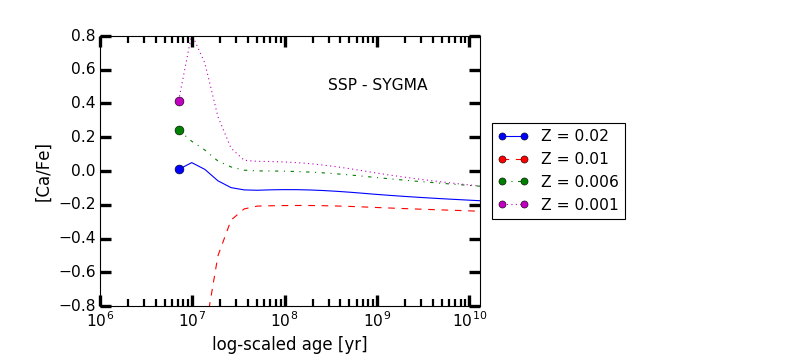

(-0.8, 0.8)

In [11]:
# Plot the evolution of [Ca/Fe] of the cumulated SSP ejecta (no other gas mixture).
%matplotlib nbagg
s_0_02.plot_spectro( yaxis=yaxis, color='b', label='Z = 0.02',  shape='-')
s_0_01.plot_spectro( yaxis=yaxis, color='r', label='Z = 0.01',  shape='--')
s_0_006.plot_spectro(yaxis=yaxis, color='g', label='Z = 0.006', shape='-.')
s_0_001.plot_spectro(yaxis=yaxis, color='m', label='Z = 0.001', shape=':')
plt.annotate('SSP - SYGMA',  xy=(0.6, 0.8), xycoords='axes fraction')
plt.ylim(-0.8,0.8)

As shown above by SYGMA, the final [Ca/Fe] ratios ejected by SSPs are similar for Z = 0.001 and 0.006 (pink dotted and green dot-dashed lines), while it is about 0.1 dex lower for Z = 0.01 (red line).  The drop seen in the GCE predictions is thus caused by the transition between Z = 0.006 yields and Z = 0.01 yields.  Let's see which stars are responsible for this feature by using the SYGMA plotting function *plot_mass_range_contributions* for both Ca and Fe.

<IPython.core.display.Javascript object>


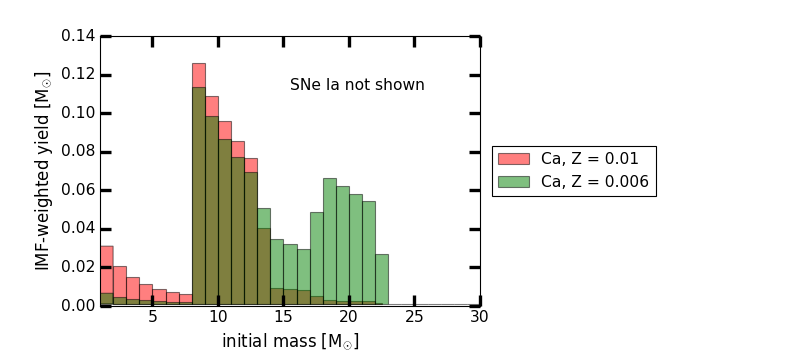

In [12]:
# Plot the contribution of individual stars on the production of Ca in SSPs.
# The contribution of SNe Ia is not included in this function.
%matplotlib nbagg
specie = 'Ca'
s_0_01.plot_mass_range_contributions( specie=specie, color='r', label='Ca, Z = 0.01')
s_0_006.plot_mass_range_contributions(specie=specie, color='g', label='Ca, Z = 0.006')
plt.annotate('SNe Ia not shown',  xy=(0.5, 0.8), xycoords='axes fraction')

<IPython.core.display.Javascript object>


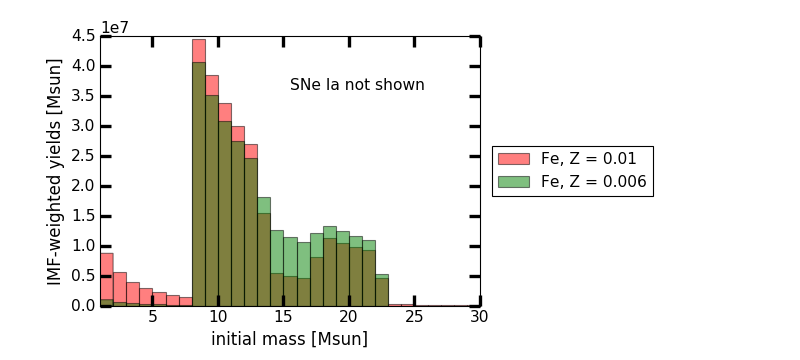

In [14]:
# Plot the contribution of individual stars on the production of Fe in SSPs.
# The contribution of SNe Ia is not included in this function.
%matplotlib nbagg
specie = 'Fe'
s_0_01.plot_mass_range_contributions( specie=specie, color='r', label='Fe, Z = 0.01')
s_0_006.plot_mass_range_contributions(specie=specie, color='g', label='Fe, Z = 0.006')
plt.annotate('SNe Ia not shown',  xy=(0.5, 0.8), xycoords='axes fraction')

As seen in the last two plots, when we go from Z = 0.006 (green) to Z = 0.01 (red), the total Fe ejected by massive stars is relatively similar, while there is a significant drop of Ca ejecta in the 15 and 20 Msun stellar models. This analysis and exercise can also be done using the *plot_mass* function with *source='massive'*.

Even if further exploration in stellar models is needed to understand why this feature occurs, this demonstrates that **SYGMA can efficiently isolate the source of peculiar behaviors seen with OMEGA**.

## 2. Star formation with inflows and outflows (gas circulation)

In the field of galaxy evolution, it is common to connect the SFH with the mass of the gas reservoir at each timestep (e.g., [Springel et al. 2001](http://adsabs.harvard.edu/abs/2001MNRAS.328..726S)).  This idea comes from the empirical relation between the star formation rate and the gas surface density of disc galaxies (e.g., [Schmidt 1959](http://adsabs.harvard.edu/abs/1959ApJ...129..243S); [Kennicutt 1998](http://adsabs.harvard.edu/abs/1998ApJ...498..541K)).

### 2.1. Mass of gas with the *SF_law* parameter

With OMEGA, this connection can be switched on using the *SF_law* parameter (see also the *DM_evolution* parameter in the OMEGA_userguide notebook).  Let's run one closed-box simulation, and one open-box simulation with the mass of gas tied to the SFH.

In [13]:
# Run OMEGA simulations without and with the "SF_law" parameter
o_without_SF = omega.omega(cte_sfr=1.0, mgal=1.0e10)
o_with_SF    = omega.omega(cte_sfr=1.0, SF_law=True) # Gas tied with SFH.

OMEGA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 3.82s
OMEGA run in progress..
..Time refinement..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 4.61s


As shown below, **when SF_law = True, the temporal profile of the gas reservoir follows the shape of the SFH**, which is constant in our case.

<IPython.core.display.Javascript object>


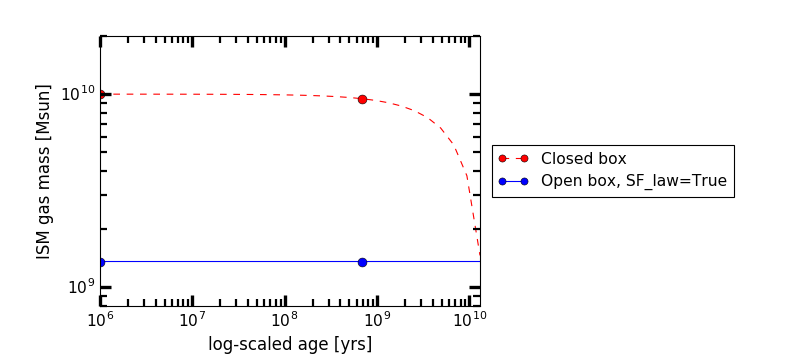

(800000000.0, 20000000000.0)

In [14]:
# Plot the mass of the gas reservoir
%matplotlib nbagg
o_without_SF.plot_totmasses(color='r', label='Closed box', shape='--')
o_with_SF.plot_totmasses(   color='b', label='Open box, SF_law=True')
plt.ylim(8e8, 2e10)

The mass of the gas reservoir at each time, $M_{gas}(t)$, can be scalled with the *sfe* parameter, which represents the star formation efficiency.

$$M_{gas}(t)=\frac{\tau}{sfe}SFH(t)$$

$\tau$ is the star formation timescale and is introduced in the OMEGA_userguide notebook (in the Getting Started section). A high star formation efficiency implies that a small gas reservoir is sufficient to form stars, while a low star formation efficiency will require a larger gas reservoir to form the same amount of stars.  This is shown in the next example.

In [15]:
# Run OMEGA simulations with different star formation efficiencies, "sfe"
o_SF_sfe_0_01 = omega.omega(cte_sfr=1.0, SF_law=True, sfe=0.01)
o_SF_sfe_0_04 = omega.omega(cte_sfr=1.0, SF_law=True, sfe=0.04)
o_SF_sfe_0_16 = omega.omega(cte_sfr=1.0, SF_law=True, sfe=0.16)

OMEGA run in progress..
   OMEGA run completed - Run time: 3.46s
OMEGA run in progress..
..Time refinement..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 2.59s
OMEGA run in progress..
..Time refinement..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 4.06s


As seen below, the star formation efficiency modifies the overall mass of gas and impact the chemical evolution predictions in a similar way than the initial mass of gas parameter, *mgal*, which is used in the closed-box model and when *in_out_control=True*. The *sfe* parameter thus play a role in the enrichment timescale.

<IPython.core.display.Javascript object>


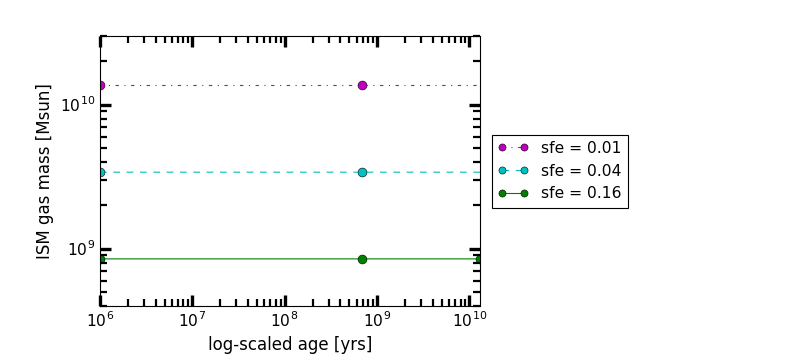

(400000000.0, 30000000000.0)

In [16]:
# Plot the mass of the gas reservoir for different *sfe* values.
%matplotlib nbagg
o_SF_sfe_0_01.plot_totmasses(color='m', label='sfe = 0.01', shape='-.')
o_SF_sfe_0_04.plot_totmasses(color='c', label='sfe = 0.04', shape='--')
o_SF_sfe_0_16.plot_totmasses(color='g', label='sfe = 0.16', shape='-')
plt.ylim(4e8, 3e10)

### 2.2. Galactic inflows and outflows

When using the *SF_law* parameter, galactic inflows and outflows operate in a symbiotic manner.  For example, if a lot of mass is ejected by galactic outflows, a lot of mass will also be introduced by galactic inflows in order to preserve the required mass of gas (which is defined by the SFH).  **The intensity of the inflow/outflow circulation plays a crucial role in the metal concentration of the galactic gas**, as shown in the next example.

In this model, the outflow rate, $M_{out}$, is defined by multiplying the SFH with the *mass_loading* parameter, $\eta$, a dimensionless proportionality constant (e.g., [Murray et al. 2015](http://adsabs.harvard.edu/abs/2005ApJ...618..569M)),

$$M_{out}(t)=\eta\, SFH(t).$$

Since the outflow rate is now a known quantity, the inflow rate is then automatically calculated at each timestep to preserve $M_{gas}(t)$.  Let's run simulations with different gas circulation intensity.

In [17]:
# Run OMEGA simulations with different outflow rates, with *mass_loading*, (and thus different inflow rates).
o_SF_ml_0_0 = omega.omega(cte_sfr=1.0, SF_law=True, sfe=0.1, mass_loading=0.0)
o_SF_ml_1_0 = omega.omega(cte_sfr=1.0, SF_law=True, sfe=0.1, mass_loading=1.0)
o_SF_ml_3_0 = omega.omega(cte_sfr=1.0, SF_law=True, sfe=0.1, mass_loading=3.0)
o_SF_ml_9_0 = omega.omega(cte_sfr=1.0, SF_law=True, sfe=0.1, mass_loading=9.0)

OMEGA run in progress..
..Time refinement..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 3.79s
OMEGA run in progress..
..Time refinement..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 3.06s
OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 4.41s
OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 3.46s


As shown in the plot below, because *SF_law* is used with a constant SFH, the mass of the gas reservoir (mostly H) stays constant with time.  However, more powerful outflows (higher *mass_loading* parameter) implies that metals (e.g., Fe) will be lost from the system.

<IPython.core.display.Javascript object>


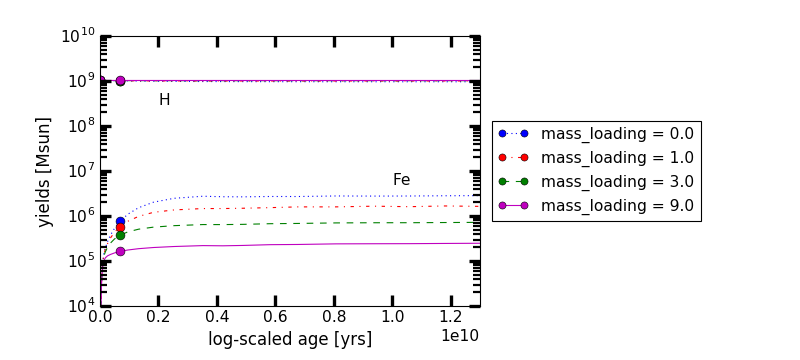

In [18]:
# Plot the mass of H, Ca, and Fe in the galactic gas as a function of time.
%matplotlib nbagg
o_SF_ml_0_0.plot_mass(specie='H',  color='b', label='mass_loading = 0.0', shape=':')
o_SF_ml_1_0.plot_mass(specie='H',  color='r', label='mass_loading = 1.0', shape='-.')
o_SF_ml_3_0.plot_mass(specie='H',  color='g', label='mass_loading = 3.0', shape='--')
o_SF_ml_9_0.plot_mass(specie='H',  color='m', label='mass_loading = 9.0', shape='-')
o_SF_ml_0_0.plot_mass(specie='Fe', color='b', show_legend=False, shape=':')
o_SF_ml_1_0.plot_mass(specie='Fe', color='r', show_legend=False, shape='-.')
o_SF_ml_3_0.plot_mass(specie='Fe', color='g', show_legend=False, shape='--')
o_SF_ml_9_0.plot_mass(specie='Fe', color='m', show_legend=False, shape='-')
plt.xscale('linear')
plt.ylim(1e4,1e10)

# Add element annotations.
plt.annotate('H',  xy=(0.2e10, 3.0e8))
plt.annotate('Fe', xy=(1.0e10, 5.0e6))

As shown in the plot below, **in the [X/Fe] vs [Fe/H] space, the intensity of the gas circulation shrinks the predictions and shifts the final [Fe/H] to lower values** (see also Section 2.1).

<IPython.core.display.Javascript object>


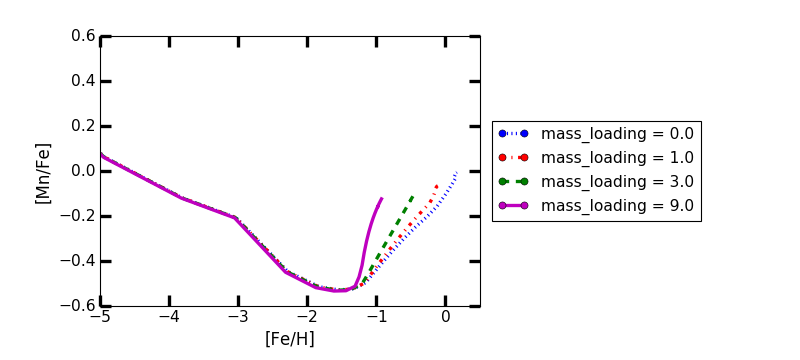

(-5, 0.5)

In [19]:
# Plot the predicted chemical evolution.
%matplotlib nbagg
yaxis = '[Mn/Fe]'
xaxis = '[Fe/H]'
o_SF_ml_0_0.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='b', label='mass_loading = 0.0', shape=':')
o_SF_ml_1_0.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='r', label='mass_loading = 1.0', shape='-.')
o_SF_ml_3_0.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='g', label='mass_loading = 3.0', shape='--')
o_SF_ml_9_0.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='m', label='mass_loading = 9.0', shape='-')
plt.xlim(-5, 0.5)

### 2.3. Exercise with SYGMA

As an exercise, you can use SYGMA to investigate why, in the last plot, the final [Mn/Fe] value decreases when the galactic outflow rate (defined by the *mass_loading* parameter) increases.

In [20]:
# Import the simple stellar population (SSP) code SYGMA.
# Run SSPs with different initial metallicities.
import sygma
reload(sygma)
s_0_01   = sygma.sygma(iniZ=0.01)
s_0_006  = sygma.sygma(iniZ=0.006)
s_0_001  = sygma.sygma(iniZ=0.001)
s_0_0001 = sygma.sygma(iniZ=0.0001)

SYGMA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   SYGMA run completed - Run time: 0.8s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.53s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.52s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.55s


<IPython.core.display.Javascript object>


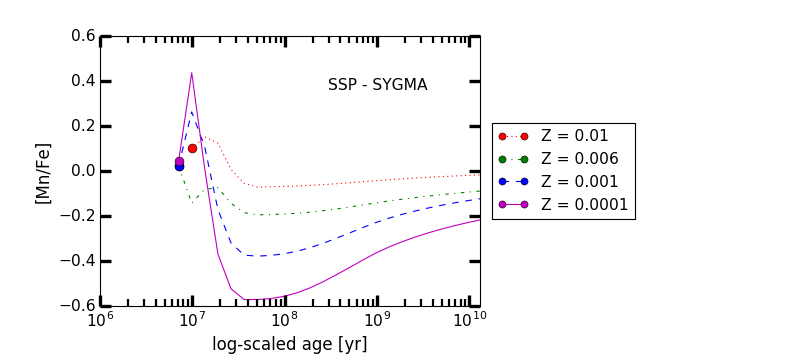

In [21]:
# Plot the evolution of [Mn/Fe] of the cumulated SSP ejecta (no other gas mixture).
%matplotlib nbagg
s_0_01.plot_spectro(  yaxis=yaxis, color='r', label='Z = 0.01', shape=':')
s_0_006.plot_spectro( yaxis=yaxis, color='g', label='Z = 0.006', shape='-.')
s_0_001.plot_spectro( yaxis=yaxis, color='b', label='Z = 0.001', shape='--')
s_0_0001.plot_spectro(yaxis=yaxis, color='m', label='Z = 0.0001', shape='-')
plt.annotate('SSP - SYGMA', xy=(0.6, 0.8), xycoords='axes fraction')

From the plot above, we see that the final [Mn/Fe] composition of a SSP ejecta increases with metallicity.  When strong galactic outflows (and inflows) are present, the [Fe/H] values are reduced.  As a consequence, more metal-poor stars will be formed and the stellar models at high metallicity will not be used, thus decreasing the [Mn/Fe] abundances of the galactic gas. 